In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt

# EDA
- # I want to analyze 541,909 transactions to understand customer purchasing behavior

## Requirements:
- ### Customer distribution analysis by country (UK-focused business)
- ### Time-series analysis of sales trends across 2010-2011
- ### Customer lifetime value distribution and Pareto analysis (80/20 rule)
- ### RFM feature distributions and correlations
- ### Product popularity analysis using StockCode and Description
- ### Cohort analysis to track customer retention over time
- ### Seasonal patterns and peak purchasing periods
- ### Geographic analysis of customer spending patterns

In [2]:
rfm_std = pd.read_csv(r"C:\Users\USER\ِAI_Project\ML Projects\CLV Prediction & Segmentation\Preprocessing\rfm_std.csv")

In [3]:
RFM = pd.read_csv(r"C:\Users\USER\ِAI_Project\ML Projects\CLV Prediction & Segmentation\Preprocessing\RFM.csv")

In [4]:
data = pd.read_csv(r"C:\Users\USER\ِAI_Project\ML Projects\CLV Prediction & Segmentation\Preprocessing\data.csv")
data.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Hour,Day of Week,Month,Season
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,8,2,12,Winter
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,8,2,12,Winter


In [5]:
data.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID,TotalPrice,Hour,Day of Week,Month
count,392084.000000,392084.000000,392084.000000,392084.000000,392084.000000,392084.000000,392084.000000,392084.000000
mean,560595.529399,11.790606,2.887614,15287.481075,20.677911,12.722202,2.607735,7.603090
std,13087.591724,25.805418,3.214718,1713.272719,53.102255,2.276245,1.924377,3.414798
min,536365.000000,1.000000,0.000000,12347.000000,0.000000,6.000000,0.000000,1.000000
25%,549235.000000,2.000000,1.250000,13955.000000,4.950000,11.000000,1.000000,5.000000
50%,561877.000000,6.000000,1.950000,15150.000000,11.900000,13.000000,2.000000,8.000000
75%,572063.000000,12.000000,3.750000,16791.000000,19.800000,14.000000,4.000000,11.000000
max,581587.000000,500.000000,50.000000,18287.000000,3285.000000,20.000000,6.000000,12.000000


# 1 - Customer distribution by country

In [6]:
data_new = data.copy()

In [7]:
Country_counts = data_new['Country'].value_counts()
threshold = 1000
other_Country = Country_counts[Country_counts < threshold].index
data_new['Country'] = data_new['Country'].replace(other_Country, 'Other')

In [8]:
country_customers = data_new.groupby("Country")["CustomerID"].nunique().sort_values(ascending=False)
country_customers

Country
United Kingdom    3901
Other              116
Germany             94
France              87
Spain               30
Belgium             25
Switzerland         21
Portugal            19
Norway              10
Australia            9
Netherlands          9
EIRE                 3
Name: CustomerID, dtype: int64

In [9]:
fig = px.bar(x=country_customers.index, y=country_customers.values)
fig.update_layout(
    title="Customer distribution by country",
    yaxis_title="Number of Customers",
    xaxis_title="Customer Countries",
    title_font_size=32,
)
fig.show()

# 2 - Time-series analysis

In [10]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate']).dt.date

In [11]:
daily_sales = data.groupby('InvoiceDate')['TotalPrice'].sum()


In [12]:
monthly_sales = data.groupby('Month')['TotalPrice'].sum()

In [13]:
monthly_sales

Month
1      445349.890
2      423487.310
3      565052.830
4      423748.381
5      635020.550
6      589337.460
7      586990.361
8      617794.260
9      887810.692
10     966897.940
11    1114398.170
12     851590.160
Name: TotalPrice, dtype: float64

In [14]:
fig = px.line(x=monthly_sales.index, y=monthly_sales.values)
fig.update_layout(
    title="Total Price per Month",
    xaxis_title="Month",
    yaxis_title="Total Price",
    title_font_size=32,
)
fig.show()

# 3 - Customer Lifetime Value distribution + Pareto (80/20)

In [15]:
RFM.head()

,CustomerID,Recency,Frequency,Monetary,CLV
0,12347.0,2,7,4310.00,5.0
1,12348.0,75,4,1797.24,3.4
2,12349.0,19,1,1457.55,2.8
3,12350.0,310,1,334.40,1.3
4,12352.0,36,7,1665.74,4.1


In [16]:
RFM.describe()

,CustomerID,Recency,Frequency,Monetary,CLV
count,4318.000000,4318.000000,4318.000000,4318.000000,4318.000000
mean,15298.146132,92.480778,4.254516,1877.600279,3.004933
std,1721.302524,99.952476,7.646603,7619.348842,1.206321
min,12347.000000,1.000000,1.000000,2.900000,1.000000
25%,13812.250000,18.000000,1.000000,302.025000,2.000000
50%,15296.500000,51.000000,2.000000,659.145000,3.000000
75%,16777.750000,142.000000,5.000000,1624.192500,4.000000
max,18287.000000,374.000000,208.000000,265207.260000,5.000000


In [17]:
fig = px.histogram(RFM, x='CLV')
fig.update_layout(
    title="CLV Distribution",
    xaxis_title="CLV",
    yaxis_title="Num of Customers",
    title_font_size=32,
)
fig.show()

# 4 - RFM (RFM Feature Distributions)

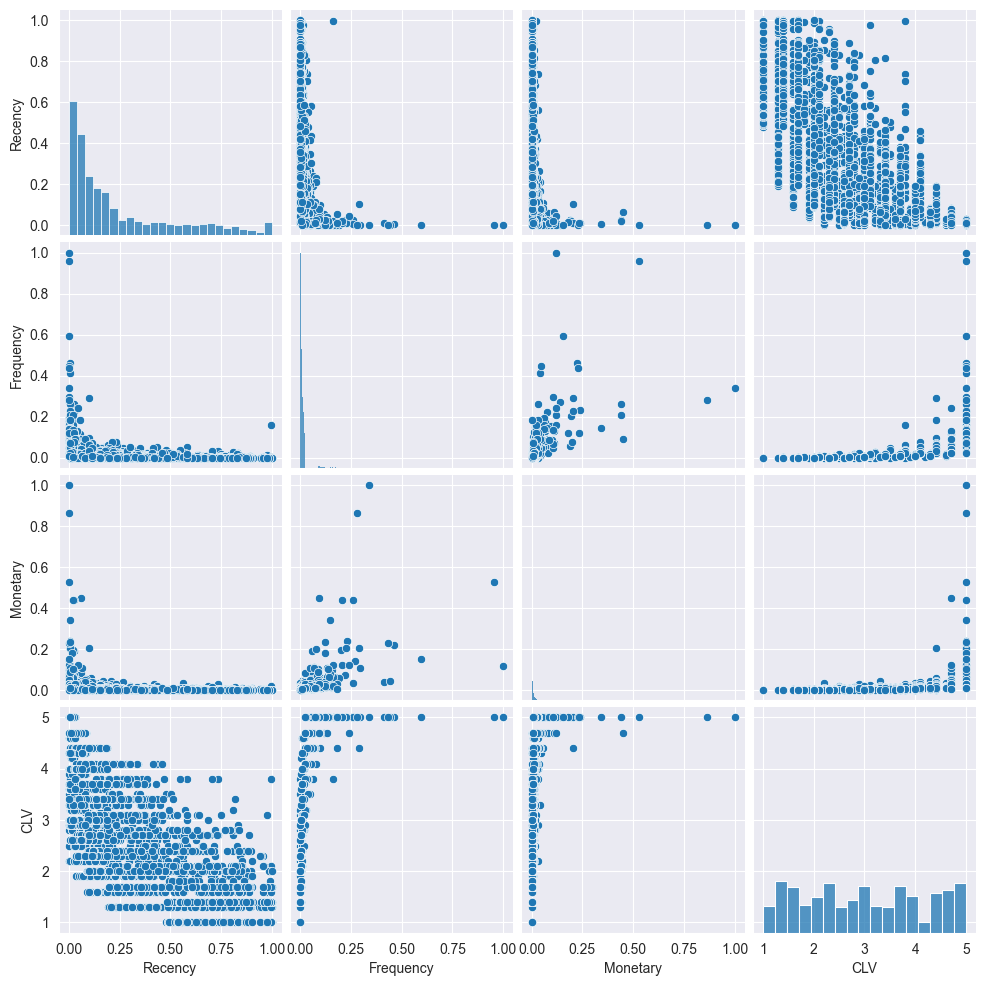

In [18]:
sns.pairplot(rfm_std)
plt.show()

In [19]:
rfm_std.corr(numeric_only = True)

,Recency,Frequency,Monetary,CLV
Recency,1.000000,-0.261177,-0.139411,-0.697886
Frequency,-0.261177,1.000000,0.603554,0.498868
Monetary,-0.139411,0.603554,1.000000,0.271497
CLV,-0.697886,0.498868,0.271497,1.000000


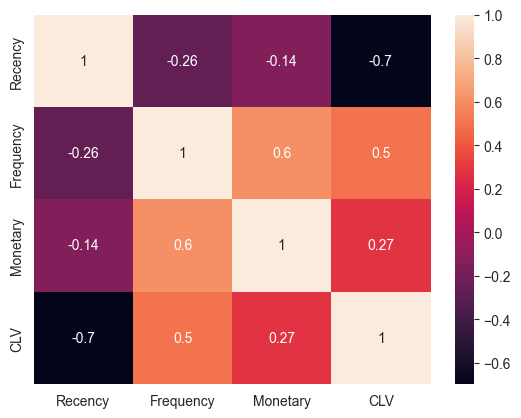

In [20]:
sns.heatmap(rfm_std.corr()  , annot = True)
plt.show()

# 5 - Product popularity analysis using StockCode and Description

In [21]:
data['StockCode'].value_counts()

StockCode
85123A    2017
22423     1714
85099B    1612
84879     1392
47566     1390
          ... 
84550        1
90011A       1
47016        1
23664        1
90130A       1
Name: count, Length: 3656, dtype: int64

In [22]:
data['Description'].value_counts()

Description
WHITE HANGING HEART T-LIGHT HOLDER    2010
REGENCY CAKESTAND 3 TIER              1714
JUMBO BAG RED RETROSPOT               1612
ASSORTED COLOUR BIRD ORNAMENT         1392
PARTY BUNTING                         1390
                                      ... 
RUBY GLASS CLUSTER NECKLACE              1
5 STRAND GLASS NECKLACE AMETHYST         1
AMBER GLASS/SHELL/PEARL NECKLACE         1
LIGHT DECORATION BATTERY OPERATED        1
WHITE ROSEBUD  PEARL EARRINGS            1
Name: count, Length: 3867, dtype: int64

In [23]:
Product_quantity = data.groupby(['StockCode', 'Description'])['Quantity'].sum().sort_values(ascending=False).reset_index()
display(Product_quantity)


,StockCode,Description,Quantity
0,85099B,JUMBO BAG RED RETROSPOT,42878
1,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,30895
2,84879,ASSORTED COLOUR BIRD ORNAMENT,30215
3,85123A,WHITE HANGING HEART T-LIGHT HOLDER,29724
4,21212,PACK OF 72 RETROSPOT CAKE CASES,27310
...,...,...,...
3882,47579,TEA TIME BREAKFAST BASKET,1
3883,21310,CAPIZ CHANDELIER,1
3884,90179C,BLACK FINE BEAD NECKLACE W TASSEL,1
3885,90181A,AMBER GLASS/SHELL/PEARL NECKLACE,1


In [24]:
top_10_products = Product_quantity.head(10)
top_10_products

,StockCode,Description,Quantity
0,85099B,JUMBO BAG RED RETROSPOT,42878
1,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,30895
2,84879,ASSORTED COLOUR BIRD ORNAMENT,30215
3,85123A,WHITE HANGING HEART T-LIGHT HOLDER,29724
4,21212,PACK OF 72 RETROSPOT CAKE CASES,27310
5,22178,VICTORIAN GLASS HANGING T-LIGHT,20484
6,22197,POPCORN HOLDER,18827
7,22386,JUMBO BAG PINK POLKADOT,18648
8,23084,RABBIT NIGHT LIGHT,18441
9,20725,LUNCH BAG RED RETROSPOT,17576


In [25]:
fig = px.bar(top_10_products,
                 y='StockCode',
                 x='Quantity',
                 hover_name='Description' )

fig.update_layout(
    title="Product popularity",
    xaxis_title="Quantity",
    yaxis_title="StockCode",
    title_font_size=32,
)
fig.show()

# 6 - Cohort Analysis

In [26]:
data_copy = data.copy()
data_copy['InvoiceMonth'] = pd.to_datetime(data_copy['InvoiceDate']).dt.to_period('M')

In [27]:
data_copy.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Hour,Day of Week,Month,Season,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30,8,2,12,Winter,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,8,2,12,Winter,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00,8,2,12,Winter,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,8,2,12,Winter,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,8,2,12,Winter,2010-12


In [28]:
Cohort_Date = data_copy.groupby('CustomerID')['InvoiceMonth'].min()
Cohort_Date.name = 'CohortMonth'

In [29]:
data_copy = data_copy.merge(Cohort_Date, on='CustomerID')


In [30]:
data_copy[['InvoiceMonth', 'CohortMonth']]

,InvoiceMonth,CohortMonth
0,2010-12,2010-12
1,2010-12,2010-12
2,2010-12,2010-12
3,2010-12,2010-12
4,2010-12,2010-12
...,...,...
392079,2011-12,2011-08
392080,2011-12,2011-08
392081,2011-12,2011-08
392082,2011-12,2011-08


In [31]:
data_copy['CohortIndex'] = (
    (data_copy['InvoiceMonth'].dt.year - data_copy['CohortMonth'].dt.year) * 12 +
    (data_copy['InvoiceMonth'].dt.month - data_copy['CohortMonth'].dt.month) + 1 )

# بحسب الفرق بين اول فاترة وتاني فاتورة


In [32]:
cohort_data = data_copy.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()
cohort_pivot = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')


In [33]:
cohort_pivot.fillna(0, inplace=True)
cohort_pivot

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12,879.0,321.0,283.0,337.0,320.0,350.0,319.0,306.0,310.0,347.0,330.0,443.0,235.0
2011-01,412.0,93.0,112.0,94.0,134.0,120.0,104.0,102.0,126.0,136.0,152.0,48.0,0.0
2011-02,378.0,71.0,71.0,107.0,102.0,92.0,96.0,104.0,93.0,115.0,26.0,0.0,0.0
2011-03,451.0,67.0,113.0,90.0,101.0,75.0,119.0,104.0,125.0,38.0,0.0,0.0,0.0
2011-04,300.0,63.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,0.0,0.0,0.0,0.0
2011-05,280.0,54.0,49.0,49.0,59.0,65.0,75.0,26.0,0.0,0.0,0.0,0.0,0.0
2011-06,242.0,42.0,38.0,64.0,54.0,80.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-07,188.0,34.0,39.0,42.0,50.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-08,170.0,34.0,43.0,41.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


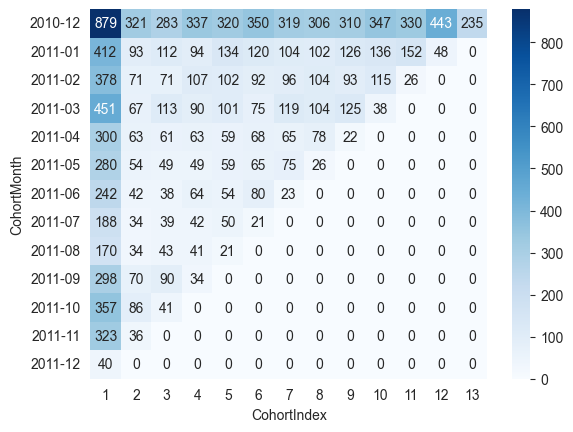

In [34]:
sns.heatmap(cohort_pivot, annot=True, fmt=".0f", cmap="Blues")
plt.show()

# 7. Seasonal patterns and peak purchasing periods

In [35]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Hour,Day of Week,Month,Season
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30,8,2,12,Winter
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,8,2,12,Winter
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00,8,2,12,Winter
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,8,2,12,Winter
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,8,2,12,Winter


In [36]:
Season = data.groupby('Season')['TotalPrice'].sum()
Season


Season
Autumn    2969106.802
Spring    1623821.761
Summer    1794122.081
Winter    1720427.360
Name: TotalPrice, dtype: float64

In [37]:
fig = px.bar(y=Season.index, x=Season.values)
fig.update_layout(
    title="Total sales by season",
    yaxis_title="Season",
    xaxis_title="Total sales",
    title_font_size=32,
)
fig.show()

In [38]:
Day = data.groupby('Day of Week')['TotalPrice'].sum()

day_map = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

Day.index = Day.index.map(day_map)
Day


Day of Week
Monday       1284423.131
Tuesday      1458024.221
Wednesday    1517040.060
Thursday     1842319.470
Friday       1226785.531
Sunday        778885.591
Name: TotalPrice, dtype: float64

In [39]:
fig = px.bar(y=Day.index, x=Day.values)
fig.update_layout(
    title="Total sales per day of the week",
    yaxis_title="Day of Week",
    xaxis_title="Total sales",
    title_font_size=32,
)
fig.show()

In [40]:
Month = data.groupby('Month')['TotalPrice'].sum()
Month

Month
1      445349.890
2      423487.310
3      565052.830
4      423748.381
5      635020.550
6      589337.460
7      586990.361
8      617794.260
9      887810.692
10     966897.940
11    1114398.170
12     851590.160
Name: TotalPrice, dtype: float64

In [41]:
fig = px.bar(x=Month.index, y=Month.values)
fig.update_layout(
    title="Total sales per Month",
    xaxis_title="Month",
    yaxis_title="Total sales",
    title_font_size=32,
)
fig.show()

In [42]:
Hour = data.groupby('Hour')['TotalPrice'].sum()
Hour

Hour
6           4.250
7       28991.730
8      264832.530
9      653414.721
10    1114792.871
11    1003853.370
12    1288900.190
13    1103042.630
14     966673.361
15     869558.840
16     437376.130
17     225814.581
18      89017.060
19      43556.460
20      17649.280
Name: TotalPrice, dtype: float64

In [43]:
fig = px.bar(x=Hour.index, y=Hour.values)
fig.update_layout(
    title="Total sales per Hour",
    xaxis_title="Hour",
    yaxis_title="Total sales",
    title_font_size=32,
)
fig.show()

# 8.Geographic analysis of customer spending patterns

In [44]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Hour,Day of Week,Month,Season
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30,8,2,12,Winter
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,8,2,12,Winter
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00,8,2,12,Winter
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,8,2,12,Winter
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,8,2,12,Winter


In [45]:
data['Country'].value_counts()

Country
United Kingdom          348691
Germany                   9018
France                    8317
EIRE                      7221
Spain                     2479
Netherlands               2348
Belgium                   2031
Switzerland               1842
Portugal                  1447
Australia                 1173
Norway                    1067
Italy                      757
Channel Islands            746
Finland                    684
Cyprus                     595
Sweden                     439
Austria                    398
Denmark                    380
Poland                     330
Japan                      309
Israel                     243
Unspecified                241
Singapore                  213
Iceland                    182
USA                        179
Canada                     149
Greece                     145
Malta                      111
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45


In [46]:
df = data.groupby('Country')['TotalPrice'].sum()
df.sort_values(ascending=True, inplace=True)

In [47]:
fig = px.bar(y=df.index, x=df.values)
fig.update_layout(
    title="Total sales per country",
    yaxis_title="Country",
    xaxis_title="Total sales",
    title_font_size=32,
)
fig.show()

In [48]:
df2 = data.groupby('Country')['TotalPrice'].sum()
df_new = pd.DataFrame(df2)
df_new.reset_index(inplace=True)
df_new.head()

,Country,TotalPrice
0,Australia,132690.37
1,Austria,10198.68
2,Bahrain,548.40
3,Belgium,41196.34
4,Brazil,1143.60


In [49]:
import pycountry

def get_iso_alpha_3(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except Exception:
        return None


df_new['iso_alpha'] = df_new['Country'].apply(get_iso_alpha_3)


print(df_new[['Country', 'iso_alpha']].head())

     Country iso_alpha
0  Australia       AUS
1    Austria       AUT
2    Bahrain       BHR
3    Belgium       BEL
4     Brazil       BRA


In [50]:
df_new.head()

,Country,TotalPrice,iso_alpha
0,Australia,132690.37,AUS
1,Austria,10198.68,AUT
2,Bahrain,548.40,BHR
3,Belgium,41196.34,BEL
4,Brazil,1143.60,BRA


In [51]:
px.choropleth(df_new , locations='iso_alpha' , color='TotalPrice', hover_name='Country')